Resources and code for Keras implementation used from the following tutorial:
https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy

## Importing and preprocessing setup data
For using local downloaded 'ubyte' MNIST data set, take a look at the follow StackOverflow thread:

https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python

In [2]:
# Loading data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Label= 9


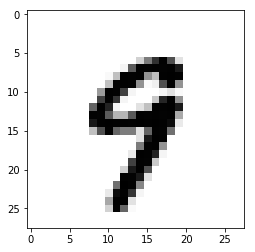

Number of images: 60000
Image size in pixels: (28, 28)


In [3]:
# Take a look at a random example
print('Label= '+ str(y_train[707]))
plt.imshow(x_train[707], cmap='Greys')
plt.show()

# get shape of the data and what it actually contains
print('Number of images: {}'.format(x_train.shape[0]))
print('Image size in pixels: {}'.format(x_train.shape[1:]))

In [4]:
# Reshaping the data, since Keras requires 4D numpy arrays
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Values should be float in order to have the decimal part
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize by dividing by 255 since its an RGB
x_train /= 255
x_test /= 255

print('x_train.shape= {}'.format(x_train.shape))


x_train.shape= (60000, 28, 28, 1)


### Creating the model architecture using Keras API

The sequential model consists of:
1. Convolutional layer with 28 filters (output), 3x3 px kernels
2. Max pooling layer with the filter of 2x2 px
3. Flatten layer to convert 2x2 matrix into 1D array
4. Fully Connected layer with 128 nodes, and RELu activation
5. Output fully connected layer with 10 nodes and SoftMax activation

In [11]:
## Building the network (using Kerasa)
def model_architecture_keras(input_shape):
    from keras.models import Sequential
    from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
    model = Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten()) #Flattening before dense layers; used for classification
    model.add(Dense(128, activation=tf.nn.relu))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation=tf.nn.softmax))
    return model

### Training method
Method to train the model (passed as input parameter):
1. Uses ADAM optimizer (improved version of Gradient Descent)
2. Uses Sparse Categorical Crossentropy for the loss function
3. Running for 'cycles'-number of epochs

In [12]:
# Training method
def model_training(model, cycles):
    model.compile(
                optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    model.fit(x=x_train, y=y_train, epochs=cycles)
    return model

### Individual prediction from the x_train dataset

In [45]:
# Method for individual prediction for a model from the dataset (from x_test)
def predict(model, index):
    plt.imshow(x_test[index].reshape(28,28), cmap='Greys')
    plt.show()
    pred = model.predict(x_test[index].reshape(1, 28, 28, 1))
    print('All accuracies: \n{}'.format(pred))
    print('\nPredicted value: {}'.format(pred.argmax()))

### Accurary evaluation for the entire dataset

In [14]:
def model_eval(x_test, y_test, model):
    model.evaluate(x_test, y_test)

### Creating the model, training, and evaluating

In [15]:
# Create the model
model = model_architecture_keras(input_shape)

Using TensorFlow backend.


In [17]:
# Train
modelFinal = model_training(model, 1)

Epoch 1/1
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0370 - acc: 0.9879


In [19]:
# Evaulate final model
model_eval(x_test, y_test, modelFinal)

10000/10000 [==============================] - 4s 406us/step


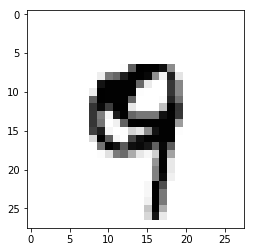

All accuracies: 
[[  2.56636536e-13   1.24019447e-13   7.08709064e-11   5.26931654e-09
    3.79402954e-05   1.71206935e-07   3.11974898e-15   1.46062287e-10
    9.06080277e-09   9.99961853e-01]]

Predicted value: 9


In [46]:
# Evaluate accuracy on single example
index = 4444
predict(modelFinal, index)